In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = np.genfromtxt('train.csv', delimiter=',', skip_header=1)
print(data)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [7. 0. 0. ... 0. 0. 0.]
 [6. 0. 0. ... 0. 0. 0.]
 [9. 0. 0. ... 0. 0. 0.]]


In [3]:
np.random.shuffle(data)
print(data)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [8. 0. 0. ... 0. 0. 0.]
 ...
 [4. 0. 0. ... 0. 0. 0.]
 [4. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [4]:
samples, features = data.shape
print(f"Samples: {samples}, Features: {features}")

Samples: 42000, Features: 785


In [5]:
samples, features = data.shape

dataT = data.T

Y = dataT[0,:]
X = dataT[1:features, :] / 255

Y_train = Y[1000:samples]
Y_test = Y[0:1000]

X_train = X[:,1000:samples]
X_test = X[:,0:1000]

In [6]:
def init_params():
    W1 = np.random.randn(10, 784) * 0.01
    B1 = np.zeros((10, 1))
    W2 = np.random.randn(10, 10) * 0.01
    B2 = np.zeros((10, 1))
    return W1, B1, W2, B2

In [7]:
def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    """Compute softmax values for each sets of scores in x."""
    exp = np.exp(Z - np.max(Z, axis=0)) # avoid huge numbers which are inaccurate
    return exp / exp.sum(axis=0)

def one_hot(Y):
    rows = Y.shape[0]
    encoded = int(Y.max()) + 1
    
    one_hot_Y = np.zeros((rows, encoded))

    row_indicies = np.arange(rows) # sequential array
    col_indicies = Y.astype(int) # the labels double up as hot-one indicies
    
    one_hot_Y[row_indicies, col_indicies] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def ReLU_deriv(Z):
    return Z > 0

In [8]:
def feedforward(W1, B1, W2, B2, X):
    if X.ndim == 1:
        A0 = X.reshape(-1, 1)
    else:
        A0 = X
    Z1 = W1.dot(A0) + B1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + B2
    A2 = softmax(Z2)
    return A0, Z1, A1, Z2, A2

In [9]:
def backprop(Z1, A1, Z2, A2, W1, W2, X, Y):
    m = len(Y)
    
    dZ2 = A2 - one_hot(Y)
    
    dW2 = 1/m * dZ2.dot(A1.T)
    dB2 = 1/m * np.sum(dZ2)

    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)

    dW1 = 1 / m * dZ1.dot(X.T)
    dB1 = 1 / m * np.sum(dZ1)

    return dW1, dB1, dW2, dB2

In [10]:
def updateParams(W1, W2, B1, B2, dW1, dW2, dB1, dB2, LR):
    W1 = W1 - LR * dW1
    W2 = W2 - LR * dW2
    B1 = B1 - LR * dB1
    B2 = B2 - LR * dB1
    return W1, B1, W2, B2

In [11]:
def get_predictions(A2):
    # Gives index position which is also the answer
    return np.argmax(A2, axis=0)

def get_accuracy(predictions, Y):
    # print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, LR, epochs):
    
    W1, B1, W2, B2 = init_params()
    
    for i in range(epochs):
        A0, Z1, A1, Z2, A2 = feedforward(W1, B1, W2, B2, X_train)
        dW1, dB1, dW2, dB2 = backprop(Z1, A1, Z2, A2, W1, W2, X_train, Y_train)
        W1, B1, W2, B2 = updateParams(W1, W2, B1, B2, dW1, dW2, dB1, dB2, LR)
    
        if i % 250 == 0:
            print('Iteration:', i)
            predictions = get_predictions(A2)
            print('Accuracy:', get_accuracy(predictions, Y))

    return W1, B1, W2, B2

In [12]:
fw1, fb1, fw2, fb2 = gradient_descent(X_train, Y_train, 0.1, 1000)

Iteration: 0
Accuracy: 0.10439024390243902
Iteration: 250
Accuracy: 0.8439024390243902
Iteration: 500
Accuracy: 0.8919756097560976
Iteration: 750
Accuracy: 0.9057073170731708


In [15]:
def make_predictions(W1, B1, W2, B2, X):
    _, _, _, _, A2 = feedforward(W1, B1, W2, B2, X)
    return get_predictions(A2)

In [18]:
test_predictions = make_predictions(fw1, fb1, fw2, fb2, X_test)

print('Accuracy:', get_accuracy(test_predictions, Y_test))

Accuracy: 0.912


In [26]:
def singlePrediction(X_sample, Y_sample, W1, B1, W2, B2):
    _, _, _, _, _A2 = feedforward(fw1, fb1, fw2, fb2, X_sample)
    print("Model Prediction:", int(np.argmax(_A2)))
    print("Correct Label:", int(Y_sample))
    current_image = X_sample
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Model Prediction: 7
Correct Label: 3


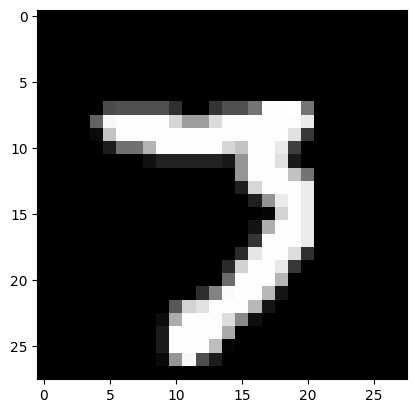

In [39]:
_x = 9
singlePrediction(X_test[:,_x], Y_test[_x], fw1, fb1, fw2, fb2)